In [329]:
%matplotlib inline

from scipy.integrate import odeint
import matplotlib.pyplot as plt  
import numpy as np

# Parámetros
E=3/2**0.5  # CAMBIAR COMO SQRT(2)*((2N+1)/2)

In [345]:
# Recibe un valor del eje x, el ancho tal que el potencial es diferente de cero en [-l,l] 
# y la profundidad del pozo V_0
def Pozo(x):
    
    # Ancho y profundida del pozo 
    l = 5
    V_0 = -5
    
    if x<-l or x>l:
        return 0
    if x>=-l and x<=l:
        return V_0
    
# Función de potencial de oscilador armónico. Recibe un punto en el eje x y la constante
def Oscilador(x):
    
    # Constante de elasticidad
    k = 2
    
    return (1/2)*k*x**2

    
# Función de la ecuación de Schrödinger
def psi(Psi, x, V):
    
    # Linealizando la ec. de Schrödinger
    # x_1' = x_2 = psi     
    # x_2' = (2m/hb**2)*(V(x)-E)x_1 = psi'
    
    return [Psi[1], (2*m)*(V(x) - E)*Psi[0]]




In [346]:
x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)
sol = odeint(psi, x0, val, args=(Oscilador,))


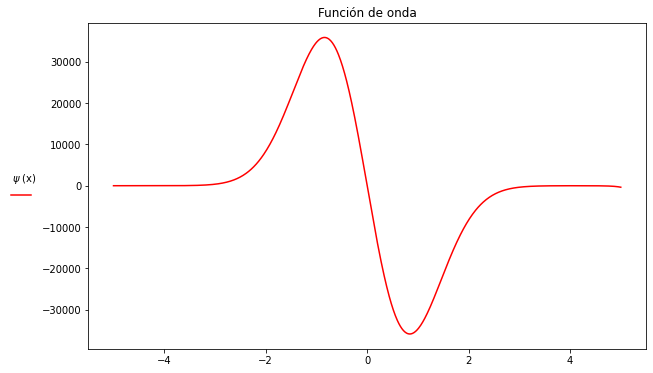

In [347]:
#Gráfica
fig = plt.figure(figsize=(10,6))
plt.plot(val,sol[:,0],color = "red",label = " " )
plt.title("Función de onda")
leg = plt.legend(title = "$\psi$ (x)  ", loc = "center", bbox_to_anchor=[-.11,.5],frameon=False)

plt.show()


In [348]:
x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)
sol = odeint(psi, x0, val, args=(Pozo,))

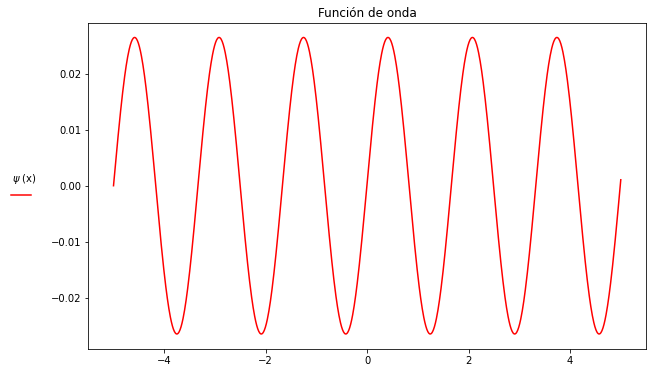

In [349]:
#Gráfica
fig = plt.figure(figsize=(10,6))
plt.plot(val,sol[:,0],color = "red",label = " " )
plt.title("Función de onda")
leg = plt.legend(title = "$\psi$ (x)  ", loc = "center", bbox_to_anchor=[-.11,.5],frameon=False)

plt.show()